## Lead Score Case Study 
#### Problem Statement: 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goal
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Step 1: Importing 

In [521]:
#importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [522]:
#importing data and checing the top 5 rows
leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [523]:
#checking the shape
leads.shape

(9240, 37)

In [524]:
#checking the information
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [525]:
#checking the summary
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

----------------

## Step 2: Inspecting the Dataframe and Data Cleaning

In [526]:
#Converting all the columns that have select into null values
leads = leads.replace('Select',np.nan)

In [527]:
#calculate % of null values in each columns
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads)

Total    Percent
How did you hear about X Education              7250  78.463203
Lead Profile                                    6855  74.188312
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

In [528]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

We can see that some variables have more than 30% of the entries null. So we can remove all the variables who's null value is more than or equal to 30%.
Variables having values null values less than 30%, we can try and impute those values

In [529]:
# putting the defined funtion in leads data and appending the values in a new table
missing_values_leads = null_values(leads)
missing_values_leads

Total    Percent
How did you hear about X Education              7250  78.463203
Lead Profile                                    6855  74.188312
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

In [530]:
#copying original dataset to leads2
leads2 = leads.copy()

In [531]:
# droping all the coloumns with more than 30% of null values
nullCol = list(missing_values_leads[missing_values_leads.Percent>=30.00].index)
leads2=leads.drop(labels=nullCol,axis=1)

In [532]:
#checing top 5 rows
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

In [533]:
#checking summary
leads2.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [534]:
#checking infor
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Lets look at `What matters most to you in choosing a course` 

In [535]:
#lets look at 'What matters most to you in choosing a course' variable
leads2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

since `What matters most to you in choosing a course` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Better Career Prospects'. So we will impute all the null values in this variable with 'Better Career Prospects' as it already have the highest selection.

In [536]:
#replacing the values
leads2.loc[leads2["What matters most to you in choosing a course"].isnull(),"What matters most to you in choosing a course"]="Better Career Prospects"

In [537]:
#checking again
leads2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Lets look at `What is your current occupation` 

In [538]:
#lets look at 'What is your current occupation' variable
leads2["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

since `What is your current occupation` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Unemployed'. So we will impute all the null values in this variable with 'Unemployed' as it already have the highest selection.

In [539]:
#replacing the values
leads2.loc[leads2["What is your current occupation"].isnull(),"What is your current occupation"]="Unemployed"

In [540]:
#checking again
leads2["What is your current occupation"].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Lets look at `Country` 

In [541]:
#lets look at 'Country' variable
leads2["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
South Africa               4
Sweden                     3
Philippines                2
Belgium                    2
China                      2
Bangladesh                 2
Uganda                     2
Ghana                      2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Kenya                      1
Sri Lanka                  1
Liberia                    1
Indonesia                  1
Tanzania                   1
Russia                     1
Vietnam       

since `Country` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'India'. So we will impute all the null values in this variable with 'India' as it already have the highest selection.

In [542]:
#replacing the values
leads2.loc[leads2["Country"].isnull(),"Country"]="India"

In [543]:
#checking again
leads2["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
South Africa               4
Sweden                     3
Philippines                2
Belgium                    2
China                      2
Bangladesh                 2
Uganda                     2
Ghana                      2
Italy                      2
Netherlands                2
Asia/Pacific Region        2
Kenya                      1
Sri Lanka                  1
Liberia                    1
Indonesia                  1
Tanzania                   1
Russia                     1
Vietnam       

#### Lets look at `TotalVisits` 

In [544]:
#lets look at 'TotalVisits' variable
leads2["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

since `TotalVisits` variable is numerical variable. We can go with either mean or median. 

Lets look at the outliers first

In [545]:
leads2["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [546]:
a = leads2[["TotalVisits",'Converted']]
a

TotalVisits  Converted
0             0.0          0
1             5.0          0
2             2.0          1
3             1.0          0
4             2.0          1
...           ...        ...
9235          8.0          1
9236          2.0          0
9237          2.0          0
9238          3.0          1
9239          6.0          1

[9240 rows x 2 columns]

In [547]:
a[a.Converted==1].value_counts()

TotalVisits  Converted
0.0          1            916
2.0          1            537
3.0          1            486
4.0          1            448
5.0          1            316
6.0          1            178
7.0          1            122
8.0          1            103
9.0          1             73
1.0          1             60
10.0         1             57
11.0         1             48
13.0         1             23
14.0         1             21
12.0         1             18
16.0         1             10
15.0         1              7
18.0         1              6
19.0         1              6
21.0         1              5
20.0         1              4
24.0         1              4
27.0         1              3
23.0         1              3
17.0         1              2
26.0         1              2
22.0         1              1
25.0         1              1
251.0        1              1
dtype: int64

In [548]:
a[(a.Converted==1) & (a.TotalVisits>20)]

TotalVisits  Converted
345          21.0          1
663          21.0          1
2154         23.0          1
2289         21.0          1
3315         24.0          1
5026         26.0          1
5078         21.0          1
5349         24.0          1
5723         21.0          1
5746         22.0          1
6102        251.0          1
6182         24.0          1
6702         26.0          1
6805         24.0          1
7421         27.0          1
7537         27.0          1
7547         23.0          1
8624         27.0          1
8684         23.0          1
9016         25.0          1

We can see that even when `TotalVisits` is at its maximum i.e. 251.0, that lead gets converted. So we can not remove these outliers

We will impute median instead of mean as the mean value is greater than mean. So imputing all the null values with median value i.e. 3.0.

In [549]:
#replacing the values
leads2.loc[leads2["TotalVisits"].isnull(),"TotalVisits"]=3.0

In [550]:
#checking describe
leads2["TotalVisits"].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Lets look at `Page Views Per Visit` 

In [551]:
#checking describe
leads2['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Lets look at the outliers first

In [552]:
b=leads2[['Page Views Per Visit','Converted']]
b.groupby(['Converted']).count()

Page Views Per Visit
Converted                      
0                          5642
1                          3461

In [553]:
b[(b['Page Views Per Visit']>20) & (b['Converted']==1)]

Page Views Per Visit  Converted
6805                  24.0          1

We can see that a lead that has `page views per visit` equal to 24 gets converted. So we can not remove outliers. We will impute all the null values with median value i.e 2.0 as median is greater than mean

In [554]:
#replacing the values
leads2.loc[leads2["Page Views Per Visit"].isnull(),"Page Views Per Visit"]=2.0

In [555]:
#checking describe again
leads2["Page Views Per Visit"].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Lets look at `Last Activity` 

In [556]:
leads2["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

since `Last Activity` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'SMS Sent'. Since 'SMS Sent' has the highest number of conversion. So we will impute all the null values in this variable with 'SMS Sent'.

In [557]:
#replacing the values
leads2.loc[leads2["Last Activity"].isnull(),"Last Activity"]="SMS Sent"

In [558]:
#Checking again
leads2["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2848
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

#### Lets look at `Lead Source` 

In [559]:
leads2["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

since `Lead Source` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Google'. So we will impute all the null values in this variable with 'Google' as it already have the highest selection.

In [560]:
#replacing the values
leads2.loc[leads2["Lead Source"].isnull(),"Lead Source"]="Google"

In [561]:
#Checking again
leads2["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
welearnblog_Home        1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Checking the null values again

In [562]:
#calculate % of null values in each columns again
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads2)

Total  Percent
Last Notable Activity                              0      0.0
What is your current occupation                    0      0.0
Lead Number                                        0      0.0
Lead Origin                                        0      0.0
Lead Source                                        0      0.0
Do Not Email                                       0      0.0
Do Not Call                                        0      0.0
Converted                                          0      0.0
TotalVisits                                        0      0.0
Total Time Spent on Website                        0      0.0
Page Views Per Visit                               0      0.0
Last Activity                                      0      0.0
Country                                            0      0.0
What matters most to you in choosing a course      0      0.0
A free copy of Mastering The Interview             0      0.0
Search                                             0      0.0
Magazine                                           0      0.0
Newspaper Article                                  0      0.0
X Education Forums                                 0      0.0
Newspaper                                          0      0.0
Digital Advertisement                              0      0.0
Through Recommendations                            0      0.0
Receive More Updates About Our Courses             0      0.0
Update me on Supply Chain Content                  0      0.0
Get updates on DM Content                          0      0.0
I agree to pay the amount through cheque           0      0.0
Prospect ID                                        0      0.0

In [563]:
#checking values in "Magzine" column
leads2['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [564]:
#checking values in "Receive More Updates About Our Courses" column
leads2['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [565]:
#checking values in "Update me on Supply Chain Content" column
leads2['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [566]:
#checking values in "Get updates on DM Content" column
leads2['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [567]:
#checking values in "I agree to pay the amount through cheque" column
leads2['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

- As 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' contains only single value, therefore we can drop these.

In [568]:
leads2 = leads2.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

### Univariant and Bivariant analysis

##### Univariant analysis

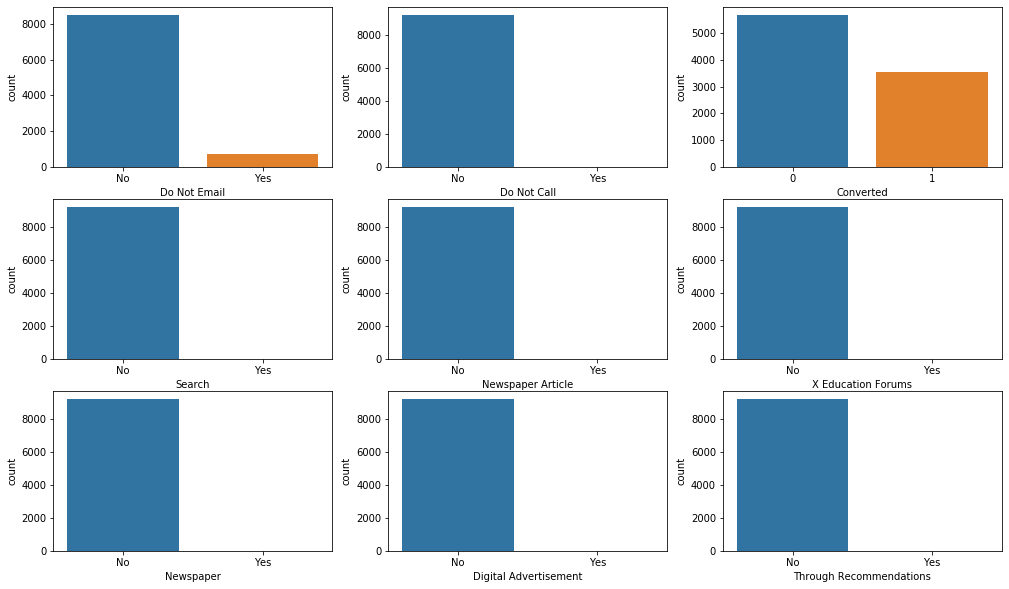

In [569]:
#coount plot  
plt.figure(figsize=(17,10))
plt.subplot(3,3,1)
sns.countplot(leads2["Do Not Email"])

plt.subplot(3,3,2)
sns.countplot(leads2["Do Not Call"])

plt.subplot(3,3,3)
sns.countplot(leads2["Converted"])

plt.subplot(3,3,4)
sns.countplot(leads2["Search"])

plt.subplot(3,3,5)
sns.countplot(leads2["Newspaper Article"])

plt.subplot(3,3,6)
sns.countplot(leads2["X Education Forums"])

plt.subplot(3,3,7)
sns.countplot(leads2["Newspaper"])

plt.subplot(3,3,8)
sns.countplot(leads2["Digital Advertisement"])

plt.subplot(3,3,9)
sns.countplot(leads2["Through Recommendations"])
plt.show()

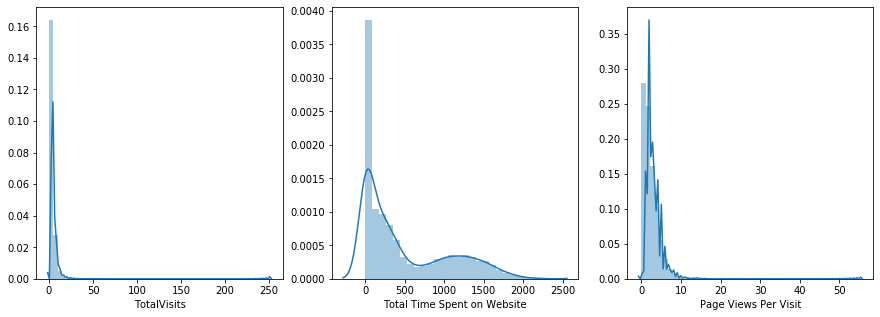

In [570]:
# Dist Plot

plt.figure(figsize=(15, 5))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
for i in enumerate(features):
    ax = plt.subplot(1, 3, i[0]+1)
    sns.distplot(leads2[i[1]])

In [571]:
#distinct values in 'X Education Forums'
leads2['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [572]:
#distinct values in 'Do Not Call'
leads2['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [573]:
#distinct values in 'Newspaper Article'
leads2['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [574]:
#distinct values in 'Newspaper'
leads2['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [575]:
#distinct values in 'Digital Advertisement'
leads2['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

- As in 'Do Not Call', 'Newspaper Article', 'Newspaper', 'Digital Advertisement','X Education Forums' value for yes are 2, 2, 1, 4,1 respectively. So these will not help in analysis so we can drop.

In [576]:
#droping columns
leads2 = leads2.drop(['Do Not Call', 'Newspaper Article', 'Newspaper', 'Digital Advertisement','X Education Forums'],axis=1)

In [577]:
#checking top 5 rows
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country What is your current occupation  \
0   India                      Unemployed   
1   India                      Unemployed   
2   India                         Student   
3   India                      Unemployed   
4   India                      Unemployed   

  What matters most to you in choosing a course Search  \
0                       Better Career Prospects     No   
1                       Better Career Prospects     No   
2                       Better Career Prospects     No   
3                       Better Career Prospects     No   
4                       Better Career Prospects     No   

  Through Recommendations A free copy of Mastering The Interview  \
0                      No                                     No   
1                      No                                     No   
2                      No                                    Yes   
3                      No                                     No   
4                      No                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

##### Bivariant Analysis

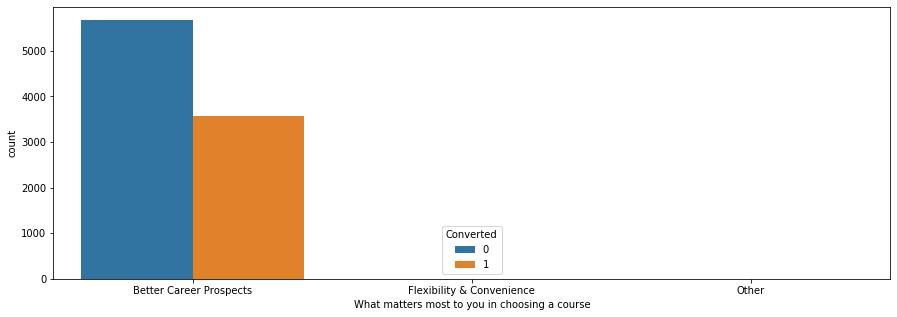

In [578]:
#count plot of 'What matters most to you in choosing a course'
plt.figure(figsize=(15,5))
sns.countplot(leads2["What matters most to you in choosing a course"],hue=leads2.Converted)
plt.show()

- For leads 'Better Career Prospects' matters most for choosing a course

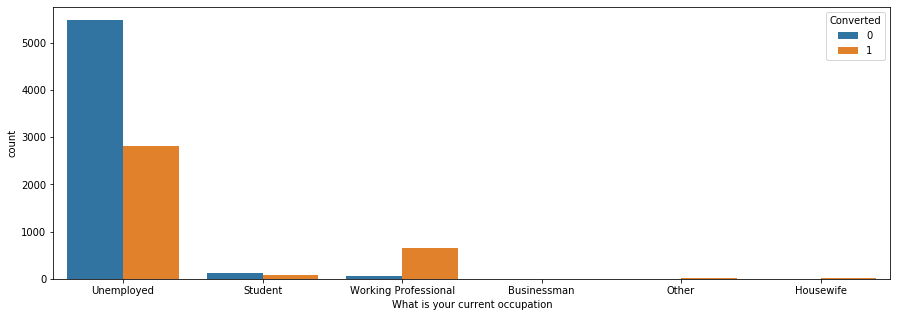

In [579]:
#count plot of 'What is your current occupation'
plt.figure(figsize=(15,5))
sns.countplot(leads2["What is your current occupation"],hue=leads2.Converted)
plt.show()

- Many leads that are 'Unemployed' take up a course 
- Some of 'Working Professional' also take up courses

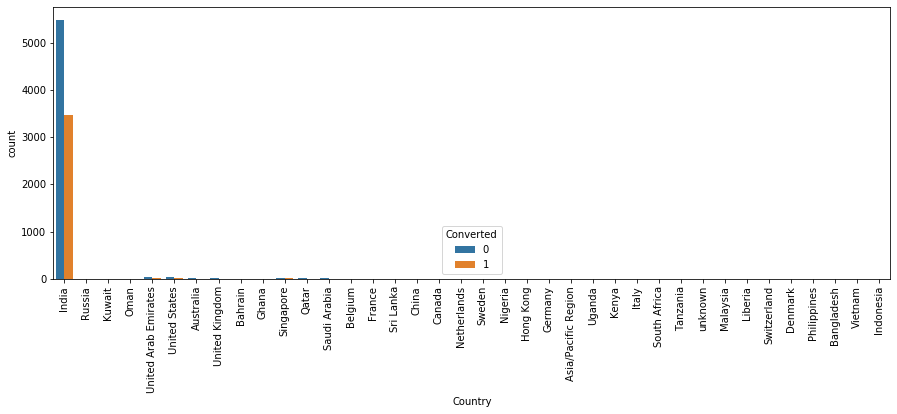

In [580]:
#count plot of 'Country'
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Country"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- India has the highest conversion

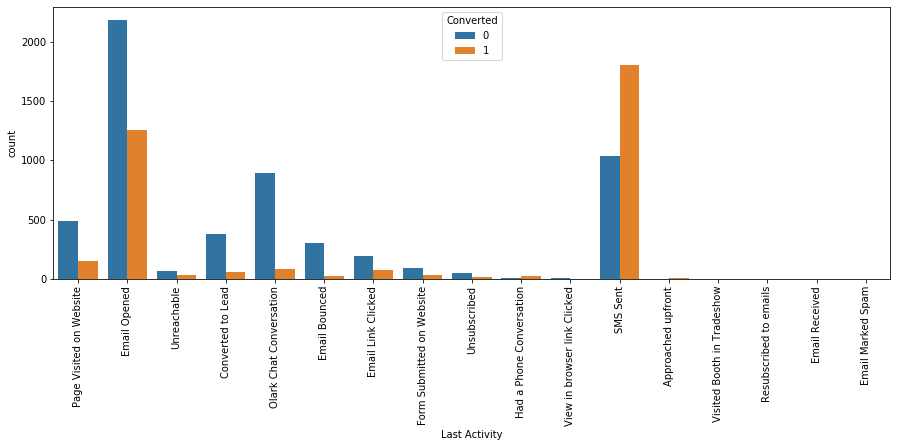

In [581]:
#count plot of 'Last Activity'
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Last Activity"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- 'SMS Sent' leads to highest conversion

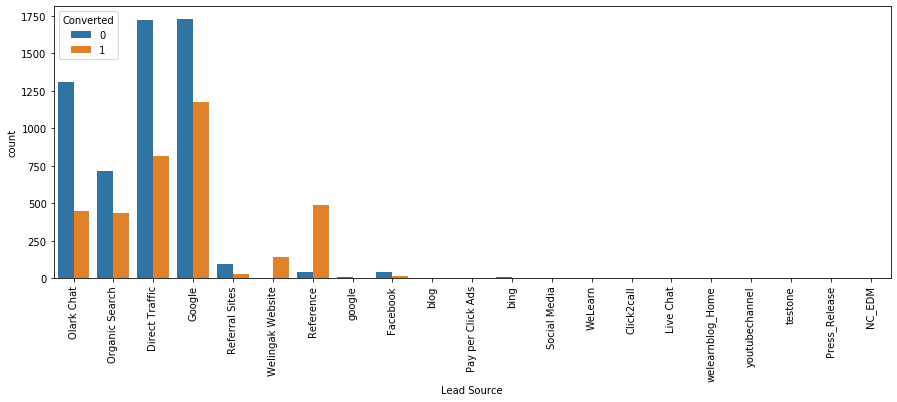

In [582]:
#count plot of 'Lead Source'
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Lead Source"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- `Lead Source` 'Google' leads to highest conversion

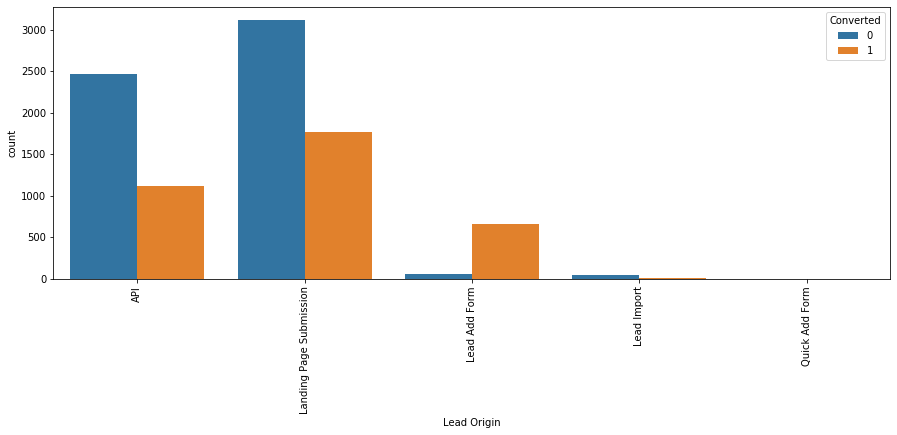

In [583]:
#count plot of 'Lead Origin'
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Lead Origin"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

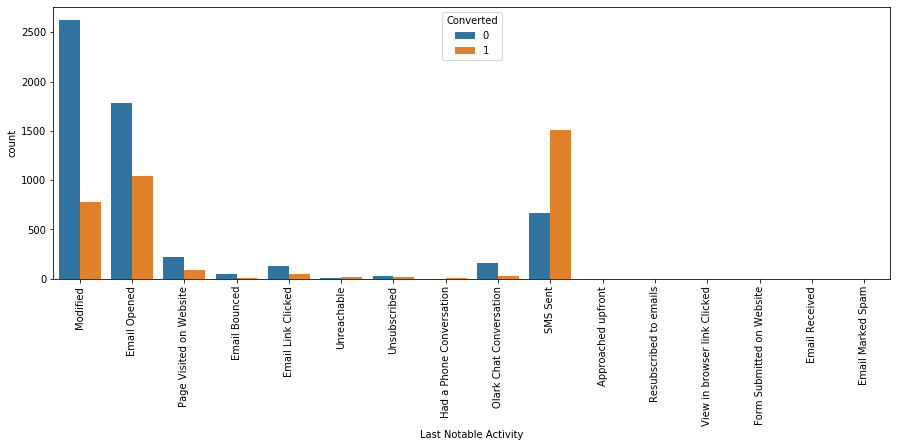

In [584]:
#count plot of 'Last Notable Activity'
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Last Notable Activity"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- `Last Notable Activity` that leaded to convert most is 'SMS Sent'

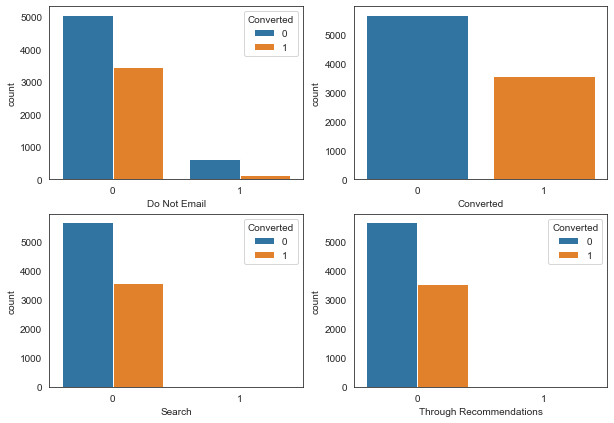

In [714]:
#Count plot
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.countplot(leads2["Do Not Email"],hue=leads2.Converted)

plt.subplot(2,2,2)
sns.countplot(leads2["Converted"])

plt.subplot(2,2,3)
sns.countplot(leads2["Search"],hue=leads2.Converted)

plt.subplot(2,2,4)
sns.countplot(leads2["Through Recommendations"],hue=leads2.Converted)
plt.show()

- Leads that select 0 from `Do Not Email` converts the most

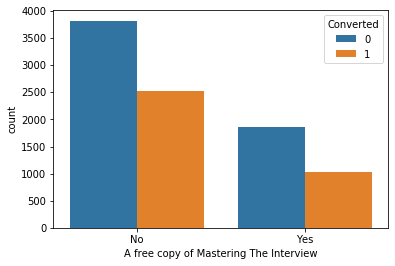

In [586]:
#Count plot of 'A free copy of Mastering The Interview'
sns.countplot(leads2["A free copy of Mastering The Interview"],hue=leads2.Converted)
plt.show()

- Leads that selected No for `A free copy of Mastering The Interview` converts the most

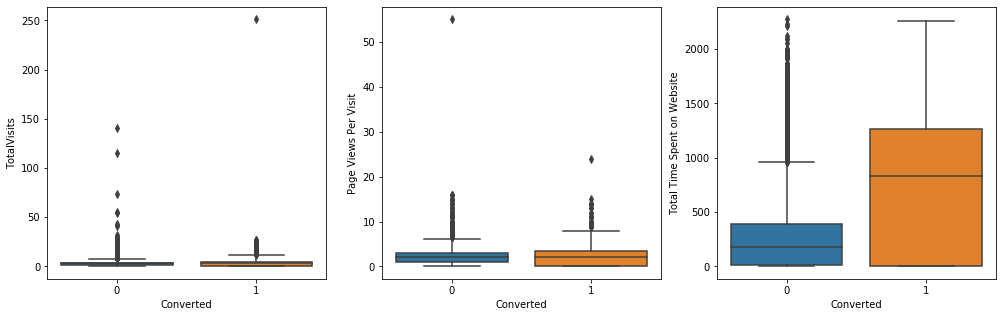

In [587]:
#Box plot
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.boxplot(y = "TotalVisits",x="Converted",data=leads2)

plt.subplot(1,3,2)
sns.boxplot(y = "Page Views Per Visit",x="Converted",data=leads2)

plt.subplot(1,3,3)
sns.boxplot(y = "Total Time Spent on Website",x="Converted",data=leads2)

plt.show()

- Leads the spend their time more on website tends to convert more

----------------

## Step 3: Data Preparation

In [588]:
#Checking the top5 rows of the data
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country What is your current occupation  \
0   India                      Unemployed   
1   India                      Unemployed   
2   India                         Student   
3   India                      Unemployed   
4   India                      Unemployed   

  What matters most to you in choosing a course Search  \
0                       Better Career Prospects     No   
1                       Better Career Prospects     No   
2                       Better Career Prospects     No   
3                       Better Career Prospects     No   
4                       Better Career Prospects     No   

  Through Recommendations A free copy of Mastering The Interview  \
0                      No                                     No   
1                      No                                     No   
2                      No                                    Yes   
3                      No                                     No   
4                      No                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [589]:
#Checking the shape
leads2.shape

(9240, 17)

In [590]:
#Converted Rate
Converted = (sum(leads2["Converted"])/len(leads2["Converted"].index))*100
Converted

38.53896103896104

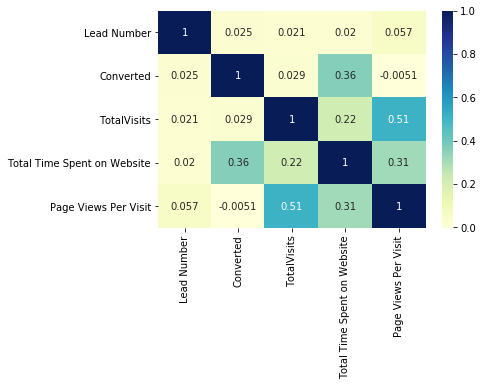

In [591]:
#heatmap
sns.heatmap(leads2.corr(),cmap="YlGnBu",annot=True)
plt.show()

- Highest correlation can be seen between `TotalVisits` and `Page Views Per Visit` of 0.51
- Second highest correlation can be seen between `Converted` and `Total Time Spend on Website` of 0.36
- Lowest correlation can be seen between `Page Views Per Visit` and `Converted` of -0.0051

#### Converting some binary variables (Yes/No) to 0/1

In [592]:
#columns in the leads2 dataframe
leads2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [593]:
#all required variables
varlist = ['Do Not Email','Search', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads2[varlist] = leads2[varlist].apply(binary_map)

In [594]:
#head of lead2 again
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country What is your current occupation  \
0   India                      Unemployed   
1   India                      Unemployed   
2   India                         Student   
3   India                      Unemployed   
4   India                      Unemployed   

  What matters most to you in choosing a course  Search  \
0                       Better Career Prospects       0   
1                       Better Career Prospects       0   
2                       Better Career Prospects       0   
3                       Better Career Prospects       0   
4                       Better Career Prospects       0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [595]:
#checking the shape again
leads2.shape

(9240, 17)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [596]:
#checking information
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [597]:
#converting lead number into object from int64
leads2['Lead Number']=leads2['Lead Number'].astype('object')

In [598]:
#all the categorical variable
cata_var = leads2.select_dtypes(exclude=['int64','float64'])
cata_var.head()

Prospect ID Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852      660681  Landing Page Submission   

      Lead Source            Last Activity Country  \
0      Olark Chat  Page Visited on Website   India   
1  Organic Search             Email Opened   India   
2  Direct Traffic             Email Opened   India   
3  Direct Traffic              Unreachable   India   
4          Google        Converted to Lead   India   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Last Notable Activity  
0                       Better Career Prospects              Modified  
1                       Better Career Prospects          Email Opened  
2                       Better Career Prospects          Email Opened  
3                       Better Career Prospects              Modified  
4                       Better Career Prospects              Modified

In [599]:
#droping 'Prospect ID','Lead Number' from cata_var as they are unique categories
cata_var.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [600]:
#checking columns in cata_var
cata_var.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [601]:
#creating dummy variables of all categorical variables excluding Country
dummy_var = pd.get_dummies(cata_var[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
       'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

#concatinating dummy variables to leads2
leads2 = pd.concat([leads2,dummy_var],axis=1)

In [602]:
#creating dummy variables of all categorical variables
dummy = pd.get_dummies(cata_var.Country,prefix='Country')
dummy.drop(['Country_Malaysia'],axis=1)

#concatinating dummy variables to leads2
leads2 = pd.concat([leads2,dummy],axis=1)

In [603]:
#checking head again
leads2.head()

Prospect ID Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852      660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Country_Sri Lanka Country_Sweden Country_Switzerland  Country_Tanzania  \
0  ...                 0              0                   0                 0   
1  ...                 0              0                   0                 0   
2  ...                 0              0                   0                 0   
3  ...                 0              0                   0                 0   
4  ...                 0              0                   0                 0   

   Country_Uganda  Country_United Arab Emirates Country_United Kingdom  \
0               0                             0                      0   
1               0                             0                      0   
2               0                             0                      0   
3               0                             0                      0   
4               0                             0                      0   

   Country_United States  Country_Vietnam  Country_unknown  
0                      0                0                0  
1                      0                0                0  
2                      0                0                0  
3                      0                0                0  
4                      0                0                0  

[5 rows x 117 columns]

In [604]:
#checking shape again
leads2.shape

(9240, 117)

#### Dropping the repeated variables

In [605]:
#droping the related variables
leads2.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity','Country'],axis=1,inplace=True)

In [606]:
leads2.head()

Prospect ID Lead Number  Do Not Email  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737             0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728             0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727             0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719             0          0   
4  3256f628-e534-4826-9d63-4a8b88782852      660681             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
0          0.0                            0                   0.0       0   
1          5.0                          674                   2.5       0   
2          2.0                         1532                   2.0       0   
3          1.0                          305                   1.0       0   
4          2.0                         1428                   1.0       0   

   Through Recommendations  A free copy of Mastering The Interview  ...  \
0                        0                                       0  ...   
1                        0                                       0  ...   
2                        0                                       1  ...   
3                        0                                       0  ...   
4                        0                                       0  ...   

   Country_Sri Lanka  Country_Sweden  Country_Switzerland  Country_Tanzania  \
0                  0               0                    0                 0   
1                  0               0                    0                 0   
2                  0               0                    0                 0   
3                  0               0                    0                 0   
4                  0               0                    0                 0   

   Country_Uganda  Country_United Arab Emirates  Country_United Kingdom  \
0               0                             0                       0   
1               0                             0                       0   
2               0                             0                       0   
3               0                             0                       0   
4               0                             0                       0   

   Country_United States  Country_Vietnam  Country_unknown  
0                      0                0                0  
1                      0                0                0  
2                      0                0                0  
3                      0                0                0  
4                      0                0                0  

[5 rows x 110 columns]

In [607]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 110 entries, Prospect ID to Country_unknown
dtypes: float64(2), int64(6), object(2), uint8(100)
memory usage: 1.6+ MB


----------------

## Step 4: Test-Train Split

In [608]:
# Putting feature variable to X
X = leads2.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  Search  Through Recommendations  \
0                   0.0       0                        0   
1                   2.5       0                        0   
2                   2.0       0                        0   
3                   1.0       0                        0   
4                   1.0       0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  ...  Country_Sri Lanka  Country_Sweden  \
0                        0  ...                  0               0   
1                        0  ...                  0               0   
2                        0  ...                  0               0   
3                        0  ...                  0               0   
4                        0  ...                  0               0   

   Country_Switzerland  Country_Tanzania  Country_Uganda  \
0                    0                 0               0   
1                    0                 0               0   
2                    0                 0               0   
3                    0                 0               0   
4                    0                 0               0   

   Country_United Arab Emirates  Country_United Kingdom  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   Country_United States  Country_Vietnam  Country_unknown  
0                      0                0                0  
1                      0                0                0  
2                      0                0                0  
3                      0                0                0  
4                      0                0                0  

[5 rows x 107 columns]

In [609]:
# Putting response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [610]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

----------------

## Step 5: Feature Scaling

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Betweem 0 and 1
2. Standardisation (mean-0, sigma-1)

This time, we will use Standardisation scaling.

In [611]:
#scaling
scaler = StandardScaler()

#scaling the requred variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -0.656434                    -0.885371   
6795             0     0.100767                     0.005716   
3516             0     0.290067                    -0.691418   
8105             0     0.290067                     1.365219   
3934             0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Through Recommendations  \
1871             -1.085519       0                        0   
6795             -0.470569       0                        0   
3516              0.070401       0                        0   
8105              1.226321       0                        0   
3934             -1.085519       0                        0   

      A free copy of Mastering The Interview  \
1871                                       0   
6795                                       1   
3516                                       0   
8105                                       0   
3934                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  ...  Country_Sri Lanka  Country_Sweden  \
1871                        0  ...                  0               0   
6795                        0  ...                  0               0   
3516                        0  ...                  0               0   
8105                        0  ...                  0               0   
3934                        0  ...                  0               0   

      Country_Switzerland  Country_Tanzania  Country_Uganda  \
1871                    0                 0               0   
6795                    0                 0               0   
3516                    0                 0               0   
8105                    0                 0               0   
3934                    0                 0               0   

      Country_United Arab Emirates  Country_United Kingdom  \
1871                             0                       0   
6795                             0                       0   
3516                             0                       0   
8105                             0                       0   
3934                             0                       0   

      Country_United States  Country_Vietnam  Country_unknown  
1871                      0                0                0  
6795                      0                0                0  
3516                      0                0                0  
8105                      0                0                0  
3934                      0                0                0  

[5 rows x 107 columns]

In [612]:
# Checking the Converted Rate
conver = 100*(sum(leads2['Converted'])/len(leads2['Converted'].index))
conver

38.53896103896104

We have almost 39% of converted rate right now

----------------

## Step 6: Looking at Correlations

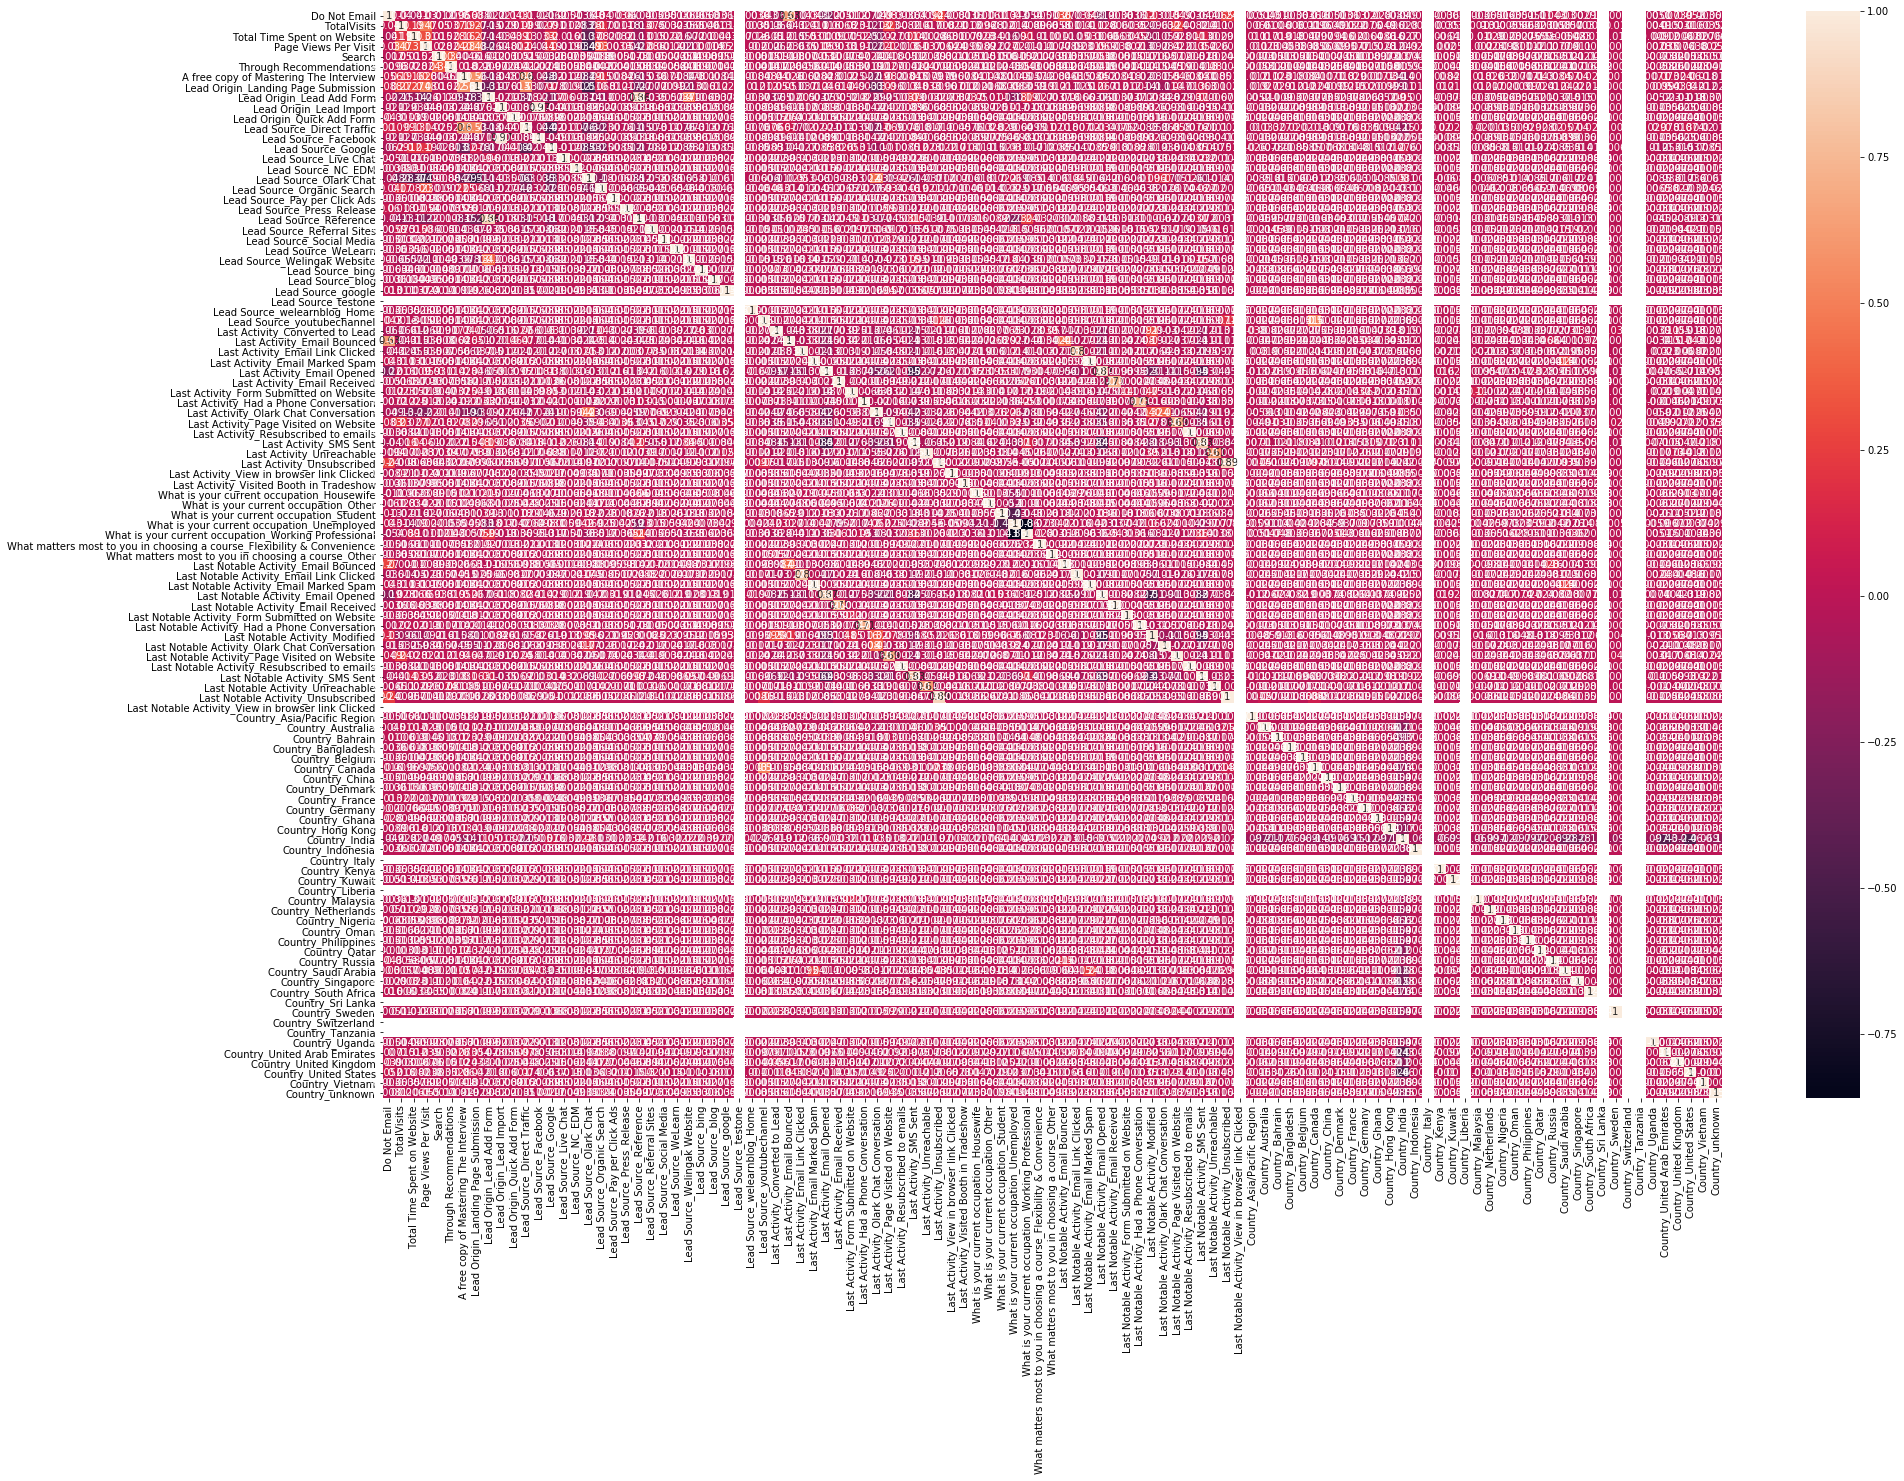

In [613]:
#heat map
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [614]:
X_train.corr()[['Lead Source_testone','Last Notable Activity_View in browser link Clicked','Country_Italy',
                'Country_Liberia','Country_Sri Lanka', 'Country_Switzerland','Country_Tanzania']]


Lead Source_testone  \
Do Not Email                                  NaN   
TotalVisits                                   NaN   
Total Time Spent on Website                   NaN   
Page Views Per Visit                          NaN   
Search                                        NaN   
...                                           ...   
Country_United Arab Emirates                  NaN   
Country_United Kingdom                        NaN   
Country_United States                         NaN   
Country_Vietnam                               NaN   
Country_unknown                               NaN   

                              Last Notable Activity_View in browser link Clicked  \
Do Not Email                                                                NaN    
TotalVisits                                                                 NaN    
Total Time Spent on Website                                                 NaN    
Page Views Per Visit                                                        NaN    
Search                                                                      NaN    
...                                                                         ...    
Country_United Arab Emirates                                                NaN    
Country_United Kingdom                                                      NaN    
Country_United States                                                       NaN    
Country_Vietnam                                                             NaN    
Country_unknown                                                             NaN    

                              Country_Italy  Country_Liberia  \
Do Not Email                            NaN              NaN   
TotalVisits                             NaN              NaN   
Total Time Spent on Website             NaN              NaN   
Page Views Per Visit                    NaN              NaN   
Search                                  NaN              NaN   
...                                     ...              ...   
Country_United Arab Emirates            NaN              NaN   
Country_United Kingdom                  NaN              NaN   
Country_United States                   NaN              NaN   
Country_Vietnam                         NaN              NaN   
Country_unknown                         NaN              NaN   

                              Country_Sri Lanka  Country_Switzerland  \
Do Not Email                                NaN                  NaN   
TotalVisits                                 NaN                  NaN   
Total Time Spent on Website                 NaN                  NaN   
Page Views Per Visit                        NaN                  NaN   
Search                                      NaN                  NaN   
...                                         ...                  ...   
Country_United Arab Emirates                NaN                  NaN   
Country_United Kingdom                      NaN                  NaN   
Country_United States                       NaN                  NaN   
Country_Vietnam                             NaN                  NaN   
Country_unknown                             NaN                  NaN   

                              Country_Tanzania  
Do Not Email                               NaN  
TotalVisits                                NaN  
Total Time Spent on Website                NaN  
Page Views Per Visit                       NaN  
Search                                     NaN  
...                                        ...  
Country_United Arab Emirates               NaN  
Country_United Kingdom                     NaN  
Country_United States                      NaN  
Country_Vietnam                            NaN  
Country_unknown                            NaN  

[107 rows x 7 columns]

In [615]:
#Droping these non related variables
X_train.drop(['Lead Source_testone','Last Notable Activity_View in browser link Clicked','Country_Italy',
                'Country_Liberia','Country_Sri Lanka', 'Country_Switzerland','Country_Tanzania'],axis=1,inplace=True)

X_test.drop(['Lead Source_testone','Last Notable Activity_View in browser link Clicked','Country_Italy',
                'Country_Liberia','Country_Sri Lanka', 'Country_Switzerland','Country_Tanzania'],axis=1,inplace=True)

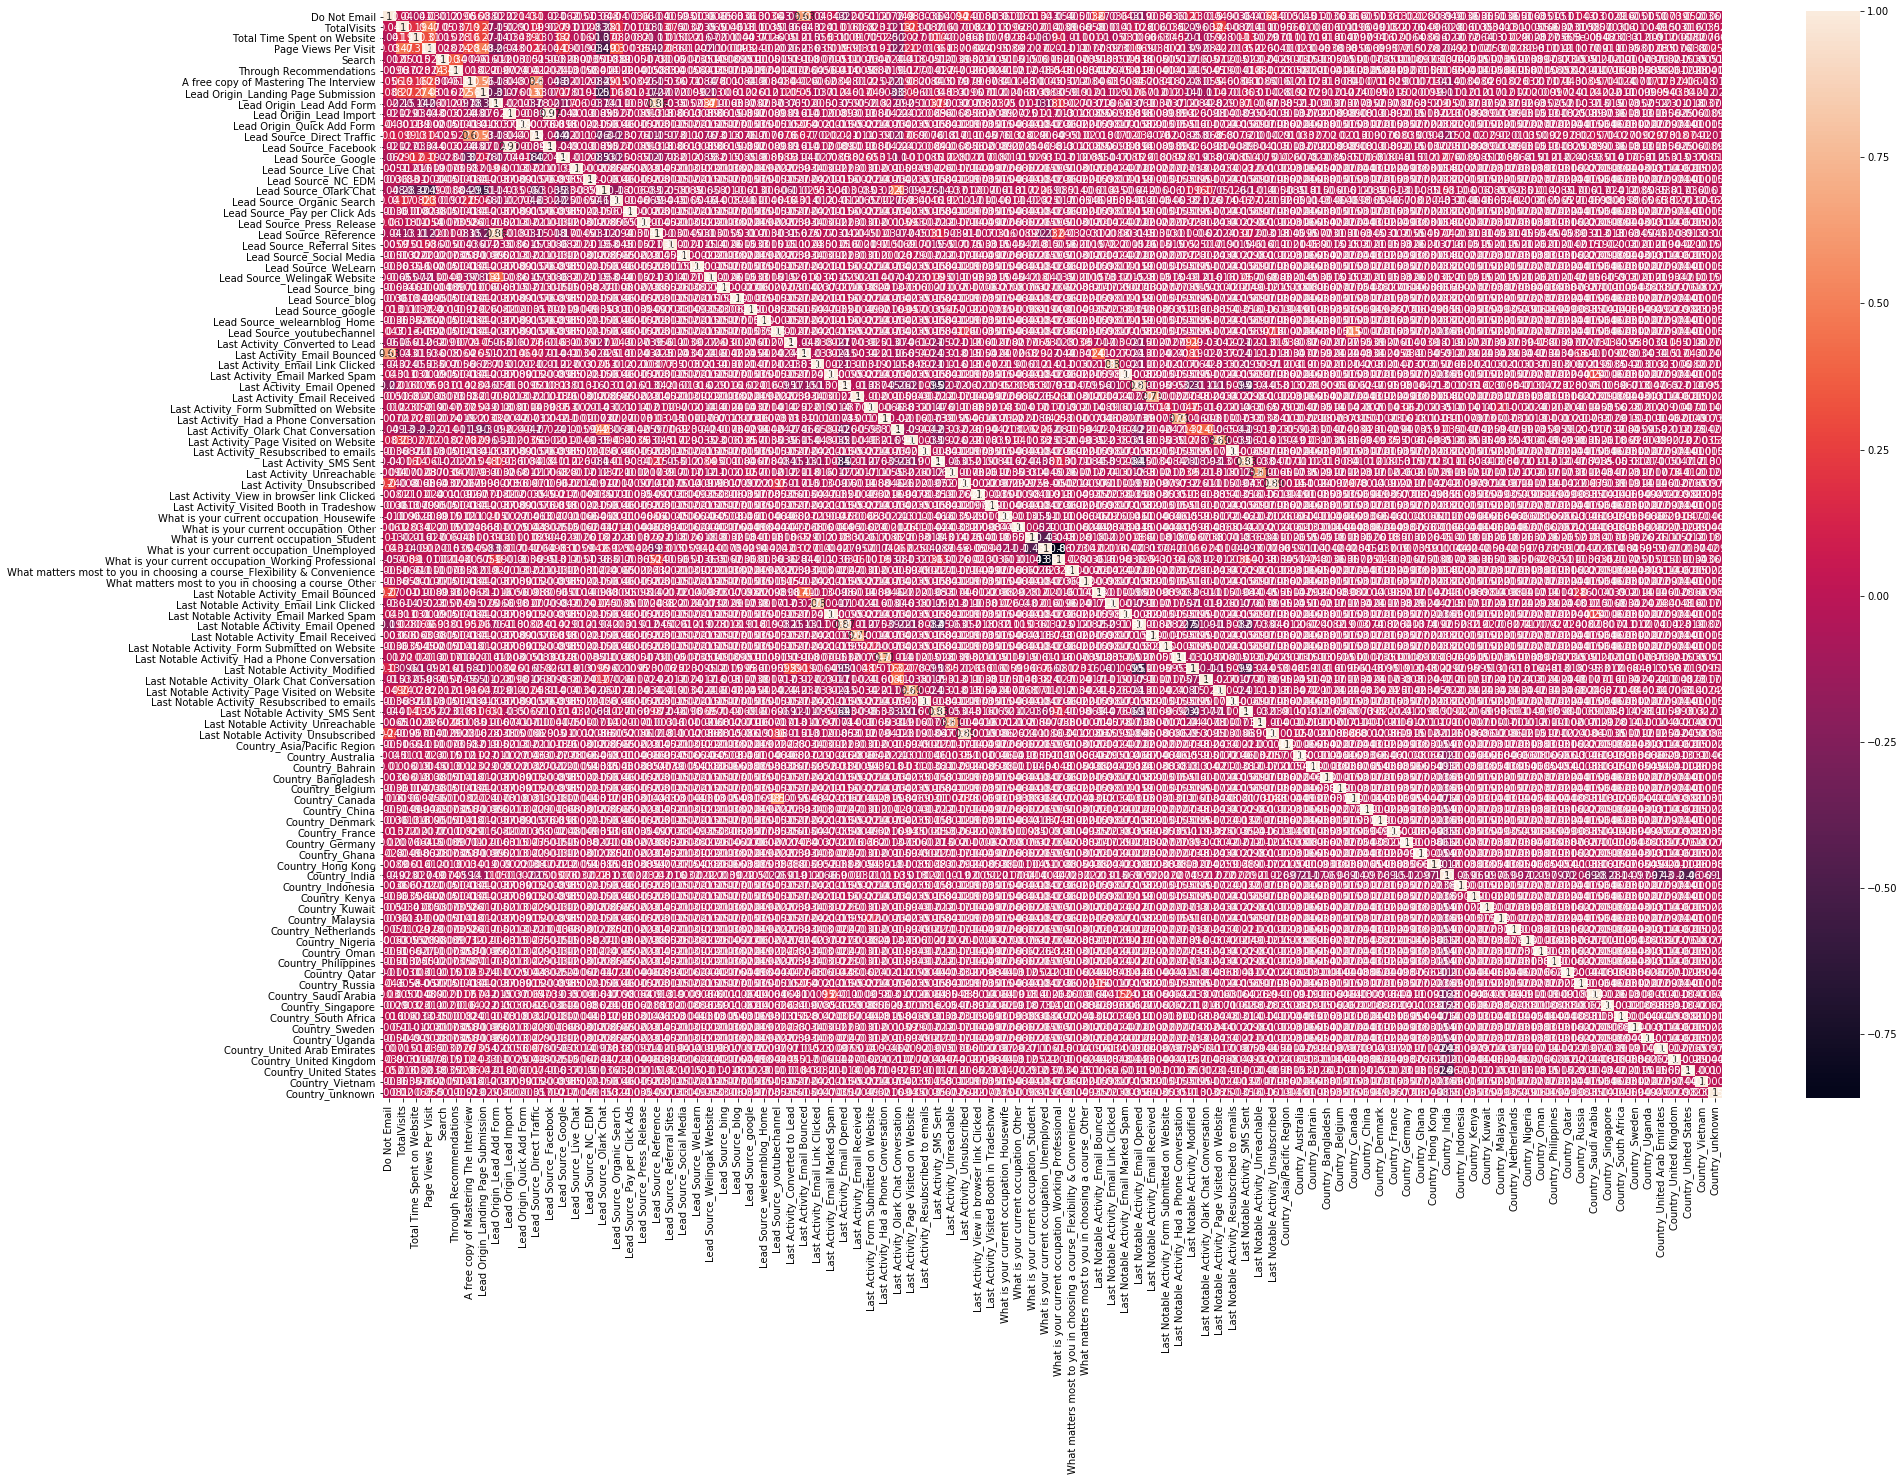

In [616]:
#heatmap again
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

- Since there are soo many variables, we cannot find correlated variables using HeatMap. Therefore, we will use some other methods to find/remove correlated matrix.

----------------

## Step 7: Model Building
- statistical significance of varibales
- VIF

#### Running Your First Training Model

In [617]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6371
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 10 Jan 2021   Deviance:                          nan
Time:                        14:19:26   Pearson chi2:                 6.80e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    3.703e+15   5.15e+07   7.19e+07      0.000     3.7e+15     3.7e+15
Do Not Email                                                            -7.689e+14   4.44e+06  -1.73e+08      0.000   -7.69e+14   -7.69e+14
TotalVisits                                                               4.07e+13   9.93e+05    4.1e+07      0.000    4.07e+13    4.07e+13
Total Time Spent on Website                                               1.56e+14   9.49e+05   1.64e+08      0.000    1.56e+14    1.56e+14
Page Views Per Visit                                                     8.993e+13    1.2e+06   7.52e+07      0.000    8.99e+13    8.99e+13
Search                                                                    1.05e+15   2.16e+07   4.86e+07      0.000    1.05e+15    1.05e+15
Through Recommendations                                                  2.382e+14   2.72e+07   8.77e+06      0.000    2.38e+14    2.38e+14
A free copy of Mastering The Interview                                   1.008e+14   2.61e+06   3.87e+07      0.000    1.01e+14    1.01e+14
Lead Origin_Landing Page Submission                                     -1.571e+13   2.66e+06  -5.91e+06      0.000   -1.57e+13   -1.57e+13
Lead Origin_Lead Add Form                                                5.611e+14    1.3e+07   4.33e+07      0.000    5.61e+14    5.61e+14
Lead Origin_Lead Import                                                  1.743e+15   4.87e+07   3.58e+07      0.000    1.74e+15    1.74e+15
Lead Origin_Quick Add Form                                               2.265e+15   6.74e+07   3.36e+07      0.000    2.26e+15    2.26e+15
Lead Source_Direct Traffic                                               -8.44e+14   4.09e+07  -2.06e+07      0.000   -8.44e+14   -8.44e+14
Lead Source_Facebook                                                     -2.55e+15   6.36e+07  -4.01e+07      0.000   -2.55e+15   -2.55e+15
Lead Source_Google                                                      -7.592e+14   4.08e+07  -1.86e+07      0.000   -7.59e+14   -7.59e+14
Lead Source_Live Chat                                                     3.28e+15   6.13e+07   5.35e+07      0.000    3.28e+15    3.28e+15
Lead Source_NC_EDM                                                       1.882e+15   7.86e+07   2.39e+07      0.000    1.88e+15    1.88e+15
Lead Source_Olark Chat                                                    -8.4e+14    4.1e+07  -2.05e+07      0.000    -8.4e+14    -8.4e+14
Lead Source_Organic Search                                               -8.54e+14    4.1e+07  -2.08e+07      0.000   -8.54e+14   -8.54e+14
Lea

----------------

## Step 8: Feature Selection Using RFE

In [618]:
logreg = LogisticRegression()

In [619]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [620]:
rfe.support_

array([ True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [621]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 65),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 68),
 ('Search', False, 38),
 ('Through Recommendations', False, 32),
 ('A free copy of Mastering The Interview', False, 86),
 ('Lead Origin_Landing Page Submission', False, 54),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Origin_Quick Add Form', False, 24),
 ('Lead Source_Direct Traffic', False, 33),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Live Chat', False, 62),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Pay per Click Ads', False, 61),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', Tru

In [622]:
col = X_train.columns[rfe.support_]

In [623]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Search',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activ

##### Model 1:

In [624]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.9
Date:                Sun, 10 Jan 2021   Deviance:                       5383.8
Time:                        14:19:36   Pearson chi2:                 7.35e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3789      0.052    -26.740      0.000      -1.480      -1.278
Do Not Email                                            -1.1294      0.190     -5.955      0.000      -1.501      -0.758
Total Time Spent on Website                              1.0966      0.039     27.901      0.000       1.020       1.174
Lead Origin_Lead Add Form                                3.6901      0.190     19.387      0.000       3.317       4.063
Lead Source_Olark Chat                                   1.1387      0.102     11.167      0.000       0.939       1.339
Lead Source_Welingak Website                             1.9248      0.743      2.592      0.010       0.469       3.380
Last Activity_Converted to Lead                         -1.2602      0.218     -5.781      0.000      -1.687      -0.833
Last Activity_Email Bounced                             -1.5602      0.422     -3.697      0.000      -2.387      -0.733
Last Activity_Olark Chat Conversation                   -1.3884      0.163     -8.530      0.000      -1.707      -1.069
What is your current occupation_Housewife               23.9347   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
What is your current occupation_Working Professional     2.7978      0.187     14.938      0.000       2.431       3.165
Last Notable Activity_Email Bounced                      1.8543      0.602      3.079      0.002       0.674       3.035
Last Notable Activity_Had a Phone Conversation           3.5962      1.098      3.274      0.001       1.443       5.749
Last Notable Activity_SMS Sent                           1.4624      0.079     18.537      0.000       1.308       1.617
Last Notable Activity_Unreachable                        1.7737      0.513      3.458      0.001       0.768       2.779
Country_Qatar                                          -23.2957    2.4e+04     -0.001      0.999   -4.71e+04     4.7e+04
========================================================================================================================
"""

##### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [625]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                         Last Activity_Email Bounced  1.94
0                                        Do Not Email  1.77
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.40
7               Last Activity_Olark Chat Conversation  1.36
4                        Lead Source_Welingak Website  1.24
1                         Total Time Spent on Website  1.22
10                Last Notable Activity_Email Bounced  1.21
12                     Last Notable Activity_SMS Sent  1.18
9   What is your current occupation_Working Profes...  1.16
5                     Last Activity_Converted to Lead  1.00
8           What is your current occupation_Housewife  1.00
11     Last Notable Activity_Had a Phone Conversation  1.00
13                  Last Notable Activity_Unreachable  1.00
14                                      Country_Qatar  1.00

##### Model 2:

In [626]:
# Dropping highly correlated variables and insignificant variables

col  = col.drop('What is your current occupation_Housewife',1)

In [627]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.9
Date:                Sun, 10 Jan 2021   Deviance:                       5397.7
Time:                        14:19:36   Pearson chi2:                 7.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3705      0.051    -26.658      0.000      -1.471      -1.270
Do Not Email                                            -1.1342      0.190     -5.980      0.000      -1.506      -0.762
Total Time Spent on Website                              1.0956      0.039     27.909      0.000       1.019       1.173
Lead Origin_Lead Add Form                                3.7046      0.190     19.503      0.000       3.332       4.077
Lead Source_Olark Chat                                   1.1323      0.102     11.117      0.000       0.933       1.332
Lead Source_Welingak Website                             1.9036      0.743      2.564      0.010       0.448       3.359
Last Activity_Converted to Lead                         -1.2673      0.218     -5.816      0.000      -1.694      -0.840
Last Activity_Email Bounced                             -1.5660      0.422     -3.707      0.000      -2.394      -0.738
Last Activity_Olark Chat Conversation                   -1.3926      0.163     -8.557      0.000      -1.712      -1.074
What is your current occupation_Working Professional     2.7923      0.187     14.909      0.000       2.425       3.159
Last Notable Activity_Email Bounced                      1.8582      0.602      3.084      0.002       0.677       3.039
Last Notable Activity_Had a Phone Conversation           3.5875      1.098      3.266      0.001       1.435       5.740
Last Notable Activity_SMS Sent                           1.4552      0.079     18.460      0.000       1.301       1.610
Last Notable Activity_Unreachable                        1.7659      0.513      3.443      0.001       0.761       2.771
Country_Qatar                                          -22.3011   1.46e+04     -0.002      0.999   -2.86e+04    2.85e+04
========================================================================================================================
"""

In [628]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                         Last Activity_Email Bounced  1.94
0                                        Do Not Email  1.77
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.40
7               Last Activity_Olark Chat Conversation  1.36
4                        Lead Source_Welingak Website  1.24
1                         Total Time Spent on Website  1.22
9                 Last Notable Activity_Email Bounced  1.21
11                     Last Notable Activity_SMS Sent  1.18
8   What is your current occupation_Working Profes...  1.16
5                     Last Activity_Converted to Lead  1.00
10     Last Notable Activity_Had a Phone Conversation  1.00
12                  Last Notable Activity_Unreachable  1.00
13                                      Country_Qatar  1.00

###### Model 3:

In [629]:
# Dropping highly correlated variables and insignificant variables
col  = col.drop('Country_Qatar',1)

In [630]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.9
Date:                Sun, 10 Jan 2021   Deviance:                       5405.8
Time:                        14:19:36   Pearson chi2:                 7.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3737      0.051    -26.733      0.000      -1.474      -1.273
Do Not Email                                            -1.1306      0.190     -5.962      0.000      -1.502      -0.759
Total Time Spent on Website                              1.0939      0.039     27.909      0.000       1.017       1.171
Lead Origin_Lead Add Form                                3.7063      0.190     19.515      0.000       3.334       4.078
Lead Source_Olark Chat                                   1.1342      0.102     11.140      0.000       0.935       1.334
Lead Source_Welingak Website                             1.9034      0.742      2.564      0.010       0.448       3.359
Last Activity_Converted to Lead                         -1.2634      0.218     -5.800      0.000      -1.690      -0.836
Last Activity_Email Bounced                             -1.5656      0.422     -3.707      0.000      -2.393      -0.738
Last Activity_Olark Chat Conversation                   -1.3913      0.163     -8.550      0.000      -1.710      -1.072
What is your current occupation_Working Professional     2.7950      0.187     14.927      0.000       2.428       3.162
Last Notable Activity_Email Bounced                      1.8582      0.602      3.085      0.002       0.678       3.039
Last Notable Activity_Had a Phone Conversation           3.5898      1.098      3.268      0.001       1.437       5.743
Last Notable Activity_SMS Sent                           1.4537      0.079     18.463      0.000       1.299       1.608
Last Notable Activity_Unreachable                        1.7681      0.513      3.448      0.001       0.763       2.773
========================================================================================================================
"""

In [631]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                         Last Activity_Email Bounced  1.94
0                                        Do Not Email  1.77
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.40
7               Last Activity_Olark Chat Conversation  1.36
4                        Lead Source_Welingak Website  1.24
1                         Total Time Spent on Website  1.22
9                 Last Notable Activity_Email Bounced  1.21
11                     Last Notable Activity_SMS Sent  1.18
8   What is your current occupation_Working Profes...  1.16
5                     Last Activity_Converted to Lead  1.00
10     Last Notable Activity_Had a Phone Conversation  1.00
12                  Last Notable Activity_Unreachable  1.00

After 3 model creation all variables have a good value of VIF and p-value. So we need not drop any variables and we can proceed with making predictions using this model only

In [632]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.230059
6795    0.203036
3516    0.269764
8105    0.828259
3934    0.230059
4844    0.992701
3297    0.102291
8071    0.992167
987     0.121924
7423    0.903770
dtype: float64

In [633]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23005919, 0.20303628, 0.26976435, 0.82825906, 0.23005919,
       0.99270103, 0.10229087, 0.99216714, 0.12192366, 0.90377027])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [634]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  LeadID
0          0        0.230059    1871
1          0        0.203036    6795
2          0        0.269764    3516
3          0        0.828259    8105
4          0        0.230059    3934

##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [635]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  LeadID  predicted
0          0        0.230059    1871          0
1          0        0.203036    6795          0
2          0        0.269764    3516          0
3          0        0.828259    8105          1
4          0        0.230059    3934          0

In [636]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3543  459]
 [ 743 1723]]


In [637]:
# Predicted     not_churn    churn
# Actual
# not_churn        3543      459
# churn            743       1723

In [638]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8141620284477428


## Metrics beyond simply accuracy

In [639]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [640]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6987023519870236

In [641]:
# Let us calculate specificity
TN / float(TN+FP)

0.8853073463268366

In [642]:
# Calculate false postive rate - predicting converted when customer does not get converted
print(FP/ float(TN+FP))

0.11469265367316342


In [643]:
# positive predictive value 
print (TP / float(TP+FP))

0.7896425297891843


In [644]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8266448903406439


----------------

## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [645]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [646]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

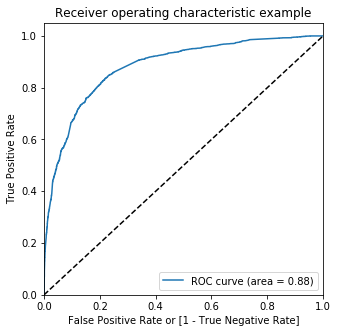

In [647]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 

----------------

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [648]:
# Let's create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.35  \
0          0        0.230059    1871          0    1    1    1    0     0   
1          0        0.203036    6795          0    1    1    1    0     0   
2          0        0.269764    3516          0    1    1    1    0     0   
3          0        0.828259    8105          1    1    1    1    1     1   
4          0        0.230059    3934          0    1    1    1    0     0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    1    1    1    1    1    0  
4    0    0    0    0    0    0

In [649]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.381262  1.000000  0.000000
0.10  0.10  0.585343  0.968370  0.349325
0.20  0.20  0.742270  0.912003  0.637681
0.30  0.30  0.800557  0.837388  0.777861
0.35  0.35  0.807050  0.804542  0.808596
0.40  0.40  0.811224  0.767640  0.838081
0.50  0.50  0.814162  0.698702  0.885307
0.60  0.60  0.795455  0.586780  0.924038
0.70  0.70  0.782777  0.513788  0.948526
0.80  0.80  0.749382  0.386456  0.973013
0.90  0.90  0.714750  0.270479  0.988506


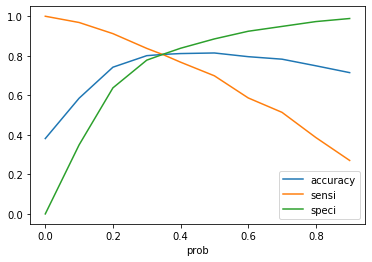

In [650]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [651]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.35  \
0          0        0.230059    1871          0    1    1    1    0     0   
1          0        0.203036    6795          0    1    1    1    0     0   
2          0        0.269764    3516          0    1    1    1    0     0   
3          0        0.828259    8105          1    1    1    1    1     1   
4          0        0.230059    3934          0    1    1    1    0     0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    1    1    1    1    1    0                1  
4    0    0    0    0    0    0                0

In [652]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8070500927643784

In [653]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3236,  766],
       [ 482, 1984]], dtype=int64)

In [654]:
# Predicted     not_churn    churn
# Actual
# not_churn        3236      766
# churn            482       1984

In [655]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [656]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8045417680454177

In [657]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085957021489255

In [658]:
# Calculate false postive rate - predicting Converted when customer does not get Converted
print(FP/ float(TN+FP))

0.19140429785107446


In [659]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7214545454545455


In [660]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8703604088219473


## Precision and Recall

In [661]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3543,  459],
       [ 743, 1723]], dtype=int64)

##### Precision
TP / TP + FP

In [662]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7896425297891843

##### Recall
TP / TP + FN

In [663]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6987023519870236

Using sklearn utilities for the same

In [664]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7896425297891843

In [665]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6987023519870236

### Precision and recall tradeoff

In [666]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [667]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

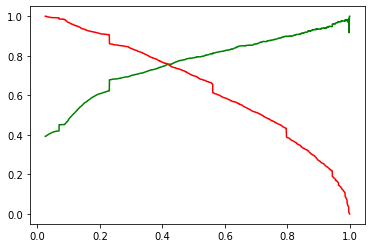

In [668]:
plt.plot(thresholds, p[:-1], "g-")  #precision
plt.plot(thresholds, r[:-1], "r-")  #recall
plt.show()

----------------

## Step 11: Making predictions on the test set

In [669]:
X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269             0          8.0                         1011   
2376             0          0.0                            0   
7766             0          5.0                           59   
9199             0          0.0                            0   
4359             0          0.0                            0   

      Page Views Per Visit  Search  Through Recommendations  \
4269                   8.0       0                        0   
2376                   0.0       0                        0   
7766                   5.0       0                        0   
9199                   0.0       0                        0   
4359                   0.0       0                        0   

      A free copy of Mastering The Interview  \
4269                                       0   
2376                                       0   
7766                                       0   
9199                                       0   
4359                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4269                                    0                          0   
2376                                    0                          1   
7766                                    0                          0   
9199                                    0                          0   
4359                                    0                          1   

      Lead Origin_Lead Import  ...  Country_Saudi Arabia  Country_Singapore  \
4269                        0  ...                     0                  0   
2376                        0  ...                     0                  0   
7766                        0  ...                     0                  0   
9199                        0  ...                     0                  0   
4359                        0  ...                     0                  0   

      Country_South Africa  Country_Sweden  Country_Uganda  \
4269                     0               0               0   
2376                     0               0               0   
7766                     0               0               0   
9199                     0               0               0   
4359                     0               0               0   

      Country_United Arab Emirates  Country_United Kingdom  \
4269                             0                       0   
2376                             0                       0   
7766                             0                       0   
9199                             0                       0   
4359                             0                       0   

      Country_United States  Country_Vietnam  Country_unknown  
4269                      0                0                0  
2376                      0                0                0  
7766                      0                0                0  
9199                      0                0                0  
4359                      0                0                0  

[5 rows x 100 columns]

In [670]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [671]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4269             0                     0.964504                          0   
2376             0                    -0.885371                          1   
7766             0                    -0.777416                          0   
9199             0                    -0.885371                          0   
4359             0                    -0.885371                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4269                       0                             0   
2376                       0                             0   
7766                       0                             0   
9199                       1                             0   
4359                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                0                            0   
9199                                0                            0   
4359                                0                            0   

      Last Activity_Olark Chat Conversation  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      1   
4359                                      0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Email Bounced  \
4269                                    0   
2376                                    0   
7766                                    0   
9199                                    0   
4359                                    0   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  
4269                               1                                  0  
2376                               1                                  0  
7766                               0                                  1  
9199                               0                                  0  
4359                               0                                  0

In [672]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [673]:
y_test_pred = res.predict(X_test_sm)

In [674]:
y_test_pred[:10]

4269    0.756763
2376    0.943628
7766    0.912051
9199    0.069183
4359    0.796426
9186    0.583319
1631    0.421983
8963    0.141152
8007    0.051317
5324    0.361638
dtype: float64

In [675]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [676]:
# Let's see the head
y_pred_1.head()

0
4269  0.756763
2376  0.943628
7766  0.912051
9199  0.069183
4359  0.796426

In [677]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [678]:
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [679]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [680]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [681]:
y_pred_final.head()

Converted  LeadID         0
0          1    4269  0.756763
1          1    2376  0.943628
2          1    7766  0.912051
3          0    9199  0.069183
4          1    4359  0.796426

In [682]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [683]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [684]:
# Let's see the head of y_pred_final
y_pred_final.head()

LeadID  Converted  Converted_Prob
0    4269          1        0.756763
1    2376          1        0.943628
2    7766          1        0.912051
3    9199          0        0.069183
4    4359          1        0.796426

In [685]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [686]:
y_pred_final.head()

LeadID  Converted  Converted_Prob  final_predicted
0    4269          1        0.756763                1
1    2376          1        0.943628                1
2    7766          1        0.912051                1
3    9199          0        0.069183                0
4    4359          1        0.796426                1

In [687]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8163780663780664

In [688]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1381,  296],
       [ 213,  882]], dtype=int64)

In [689]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [690]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8054794520547945

In [691]:
# Let us calculate specificity
TN / float(TN+FP)

0.8234943351222421

In [692]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7487266553480475

In [693]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8054794520547945

## Observation:
After running the model on the Train and Test data we have these final observations:

##### Train Data: 
- Accuracy: 80.71%
- Sensitivity: 80.45%
- Specificity: 80.86%
- Precision: 78.96%
- Recall: 69.87%

##### Test Data:
- Accuracy: 81.64%
- Sensitivity: 80.55%
- Specificity: 82.35%
- Precision: 74.87%
- Recall: 80.55%

The Model seems to predict the Conversion Rate within our required range and we can give the CEO confidence for making good calls on the basis of this model. 
- While we have checked both Sensitivity, Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- The 'Accuracy', 'Senstivity' and 'Specificity' of both Train and test dataset are almost same.

Higher the Lead Score more better. So we have a table below according to which we can make our choises:

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

Since we got a accuracy of 81.64% on our test dataset, our model seems to be doing good.

----------------

## Step 12: Calculating Lead score for the entire dataset

#### Lead Score = 100 * ConversionProbability

In [694]:
# This Lead Score needs to be on original dataset (train+test)

In [695]:
#Test dataset with convertion probability and final predicted value
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

LeadID  Converted  Converted_Prob  final_predicted
0    4269          1        0.756763                1
1    2376          1        0.943628                1
2    7766          1        0.912051                1
3    9199          0        0.069183                0
4    4359          1        0.796426                1

In [696]:
#Train dataset with conversion probability and final predicted value
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

Converted  Converted_Prob  LeadID  predicted  0.0  0.1  0.2  0.3  0.35  \
0          0        0.230059    1871          0    1    1    1    0     0   
1          0        0.203036    6795          0    1    1    1    0     0   
2          0        0.269764    3516          0    1    1    1    0     0   
3          0        0.828259    8105          1    1    1    1    1     1   
4          0        0.230059    3934          0    1    1    1    0     0   

   0.4  0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0    0                0  
1    0    0    0    0    0    0                0  
2    0    0    0    0    0    0                0  
3    1    1    1    1    1    0                1  
4    0    0    0    0    0    0                0

In [697]:
#Dropping unnecessary columns
leads_train_pred = leads_train_pred[['LeadID','Converted','Converted_Prob','final_predicted']]
leads_train_pred.head()

LeadID  Converted  Converted_Prob  final_predicted
0    1871          0        0.230059                0
1    6795          0        0.203036                0
2    3516          0        0.269764                0
3    8105          0        0.828259                1
4    3934          0        0.230059                0

In [698]:
#Concatenating both the datasets
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

LeadID  Converted  Converted_Prob  final_predicted
0    1871          0        0.230059                0
1    6795          0        0.203036                0
2    3516          0        0.269764                0
3    8105          0        0.828259                1
4    3934          0        0.230059                0

In [699]:
#Checking the shape
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6468, 4)
(2772, 4)
(9240, 4)


In [700]:
#Checking CustID is unique or not
len(lead_full_pred['LeadID'].unique().tolist())

9240

In [701]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [702]:
#Calculating the lead score
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

LeadID  Converted  Converted_Prob  final_predicted  Lead_Score
0    1871          0        0.230059                0          23
1    6795          0        0.203036                0          20
2    3516          0        0.269764                0          27
3    8105          0        0.828259                1          83
4    3934          0        0.230059                0          23

In [703]:
#Making CustID index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

Converted  Converted_Prob  final_predicted  Lead_Score
LeadID                                                        
0               0        0.230059                0          23
1               0        0.270291                0          27
2               1        0.673518                1          67
3               0        0.150371                0          15
4               1        0.321383                0          32

In [704]:
original_leads = leads2[['Lead Number']]
original_leads.head()

Lead Number
0      660737
1      660728
2      660727
3      660719
4      660681

In [705]:
#Concatenating original dataset and lead full pred dataset
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head()

Lead Number  Converted  Converted_Prob  final_predicted  Lead_Score
0      660737          0        0.230059                0          23
1      660728          0        0.270291                0          27
2      660727          1        0.673518                1          67
3      660719          0        0.150371                0          15
4      660681          1        0.321383                0          32

In [706]:
#Checkin shape
leads_with_score.shape

(9240, 5)

In [707]:
#Checking for any null values
#calculate % of null values in each columns
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads_with_score)

Total  Percent
Lead_Score           0      0.0
final_predicted      0      0.0
Converted_Prob       0      0.0
Converted            0      0.0
Lead Number          0      0.0

----------------

## Step 13: Determining Feature Importance

##### Selecting on the basis of coefficients of the selected features from our final model 

In [709]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
sorted_idx = new_params.sort_values(ascending=False)
sorted_idx

Lead Origin_Lead Add Form                               3.71
Last Notable Activity_Had a Phone Conversation          3.59
What is your current occupation_Working Professional    2.79
Lead Source_Welingak Website                            1.90
Last Notable Activity_Email Bounced                     1.86
Last Notable Activity_Unreachable                       1.77
Last Notable Activity_SMS Sent                          1.45
Lead Source_Olark Chat                                  1.13
Total Time Spent on Website                             1.09
Do Not Email                                           -1.13
Last Activity_Converted to Lead                        -1.26
Last Activity_Olark Chat Conversation                  -1.39
Last Activity_Email Bounced                            -1.57
dtype: float64

In [710]:
import_feat = pd.DataFrame(sorted_idx).reset_index()
import_feat.columns = ['Features', 'Coefficients']
import_feat.sort_values(by='Coefficients',ascending=False).head()

Features  Coefficients
0                          Lead Origin_Lead Add Form          3.71
1     Last Notable Activity_Had a Phone Conversation          3.59
2  What is your current occupation_Working Profes...          2.79
3                       Lead Source_Welingak Website          1.90
4                Last Notable Activity_Email Bounced          1.86

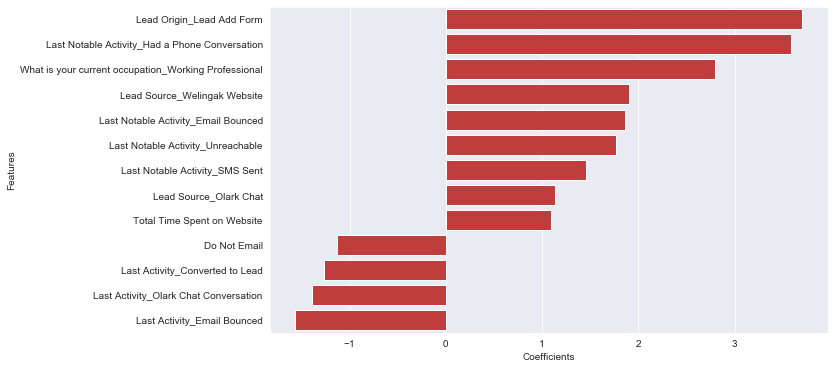

In [711]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.barplot(data = import_feat, y='Features',x='Coefficients',color='tab:red',)
plt.show()

----------------

## Step 14: Conclusion

The conversion rate will increase with increase in the values of the following features:

| Features | coefficients |
| --- | --- |
| Lead Origin_Lead Add Form |                               3.71 |
| Last Notable Activity_Had a Phone Conversation |          3.59 |
| What is your current occupation_Working Professional |    2.79 |
| Lead Source_Welingak Website |                            1.90 |
| Last Notable Activity_Email Bounced |                     1.86 |
| Last Notable Activity_Unreachable |                       1.77 |
| Last Notable Activity_SMS Sent |                          1.45 |
| Lead Source_Olark Chat |                                  1.13 |
| Total Time Spent on Website |                             1.09 |

The conversion rate will increase with decrease in the values of the following features:	

| Features | coefficients |
| --- | --- |
| Do Not Email |                                           -1.13 |
| Last Activity_Converted to Lead |                        -1.26 |
| Last Activity_Olark Chat Conversation |                  -1.39 |
| Last Activity_Email Bounced |                            -1.57 |

##### Train Data: 
- Accuracy: 80.71%
- Sensitivity: 80.45%
- Specificity: 80.86%
- Precision: 78.96%
- Recall: 69.87%

##### Test Data:
- Accuracy: 81.64%
- Sensitivity: 80.55%
- Specificity: 82.35%
- Precision: 74.87%
- Recall: 80.55%